In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt

# Decimal = ',' hyper important pour que python comprenne les nombres
data = pd.read_csv('/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv', delimiter=';', decimal=',', encoding = "ISO-8859-1")
display(data)

,IDENT_IND,IDENT_MEN,MVEH,POND_JOUR,MOTPREC,MMOTIFDES,MSTATION,Motif,Stationnement,Lieu_Depart,...,MVEHEXT,INSTANT_DEPART,INSTANT_ARRIVEE,DISTANCE,KVAQUIV,TRAVAILLE,Segment_detail,IDENT_V,Segment,num_dep_V
0,110000011400001,1100000114000,1,9891.108772,1.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-03 14:15:00,2029-01-03 14:20:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,1
1,110000011400001,1100000114000,1,9891.108772,2.1,1.1,4,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,...,NaN,2029-01-03 14:45:00,2029-01-03 14:50:00,2.200000,1.0,2,Particulier,110000011400001_1_Particulier,Particulier,2
2,110000011500001,1100000115000,2,5275.295948,1.1,1.4,6,"Étudier (école, lycée, université)",Emplacement dans un parking public ou commerci...,Domicile,...,NaN,2029-01-05 07:45:00,2029-01-05 08:45:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,1
3,110000011500001,1100000115000,2,5275.295948,1.4,1.1,4,Retour au domicile,"Emplacement privé, gratuit (y compris domicile)",Parking,...,NaN,2029-01-05 10:30:00,2029-01-05 11:00:00,28.000000,1.0,2,Particulier,110000011500001_2_Particulier,Particulier,2
4,110000013500002,1100000135000,1,24058.724023,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Domicile,...,NaN,2029-01-03 15:00:00,2029-01-03 15:15:00,5.321410,1.0,1,Particulier,110000013500002_1_Particulier,Particulier,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22521,940000044100001,9400000441000,1,15761.857518,3.1,2.1,5,Se rendre dans une grande surface ou un centre...,Emplacement dans un parking public ou commerci...,Rue,...,NaN,2029-01-03 10:30:00,2029-01-03 10:35:00,1.000000,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,2
22522,940000044100001,9400000441000,1,15761.857518,2.1,4.1,3,"Démarche administrative, recherche d'informations","Stationnement sur la voie publique, payant",Parking,...,NaN,2029-01-03 11:30:00,2029-01-03 11:35:00,1.000000,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,3
22523,940000044100001,9400000441000,1,15761.857518,4.1,1.1,1,Retour au domicile,"Stationnement sur la voie publique, gratuit sa...",Rue,...,NaN,2029-01-03 12:00:00,2029-01-03 13:00:00,36.476190,1.0,2,Particulier,940000044100001_1_Particulier,Particulier,4
22524,940000052100001,9400000521000,2,14068.334434,1.1,9.1,4,Travailler dans son lieu fixe et habituel,"Emplacement privé, gratuit (y compris domicile)",Rue,...,NaN,2029-01-03 06:00:00,2029-01-03 06:45:00,21.661727,1.0,1,Particulier,940000052100001_2_Particulier,Particulier,1


In [10]:
data_semaine = data[data['TYPE_jour'].isin(['lundi','mardi','mercredi','jeudi','vendredi'])]
data_we = data[data['TYPE_jour'].isin(['samedi','dimanche'])]

In [15]:
premiers_departs_semaine = data_semaine.groupby('IDENT_MEN')['HEURE_DEPART'].min()
premiers_departs_we = data_we.groupby('IDENT_MEN')['HEURE_DEPART'].min()

In [17]:
from scipy.stats import ks_2samp
statistic, p_value = ks_2samp(premiers_departs_semaine, premiers_departs_we)

print("Statistique de test KS :", statistic)
print("Valeur-p :", p_value)


Statistique de test KS : 0.2876997118630356
Valeur-p : 1.2334239426902027e-84


In [24]:
data_lundi = data[data['TYPE_jour'].isin(['lundi'])]
data_mardi = data[data['TYPE_jour'].isin(['jeudi'])]
premiers_departs_lundi = data_lundi.groupby('IDENT_MEN')['HEURE_DEPART'].min()
premiers_departs_mardi = data_mardi.groupby('IDENT_MEN')['HEURE_DEPART'].min()
statistic, p_value = ks_2samp(premiers_departs_lundi, premiers_departs_mardi)

print("Statistique de test KS :", statistic)
print("Valeur-p :", p_value)


Statistique de test KS : 0.07816186392566664
Valeur-p : 0.0035422762197318824


Paramètres de la loi log-normale ajustée : sigma=0.3189296144566387, loc=0, scale=9.573946179214783


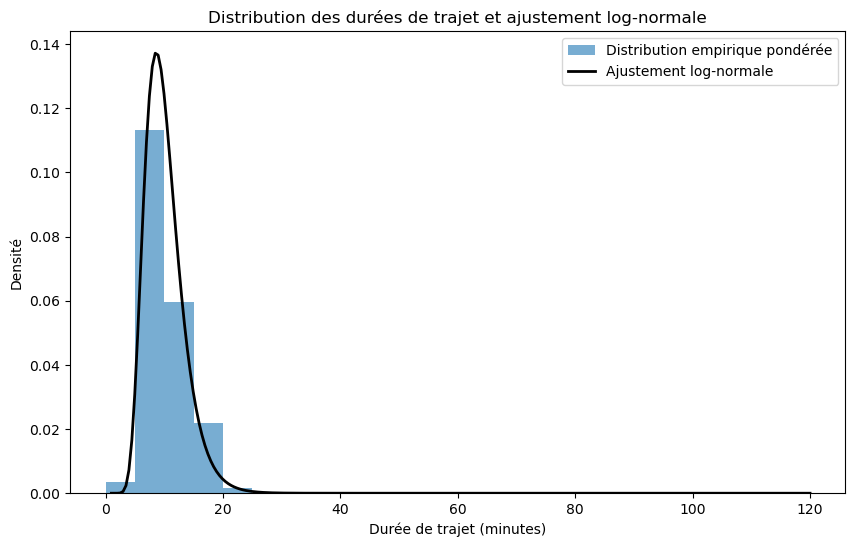

In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt

def load_and_prepare_data(filepath):
    """Charge et prépare les données."""
    data = pd.read_csv(filepath, sep=';', encoding='ISO-8859-1', decimal=',')
    return data

def calculate_trip_durations(data):
    """Calcule les durées de trajet en minutes."""
    def convert_to_minutes(start_time_str, end_time_str):
        start_time = datetime.strptime(start_time_str, '%Y-%m-%d %H:%M:%S')
        end_time = datetime.strptime(end_time_str, '%Y-%m-%d %H:%M:%S')
        if end_time < start_time:
            end_time = datetime(year=start_time.year, month=start_time.month, day=start_time.day, hour=23, minute=59)
        duration = (end_time - start_time).total_seconds() / 60.0
        return duration

    data['TEMPS_TRAJET_MIN'] = data.apply(lambda row: convert_to_minutes(row['INSTANT_DEPART'], row['INSTANT_ARRIVEE']), axis=1)
    return data

def filter_data(data):
    """Filtre les données pour les trajets de moins de 120 minutes et strictement positifs."""
    return data[(data['TEMPS_TRAJET_MIN'] < 120) & (data['TEMPS_TRAJET_MIN'] > 0)]

def fit_and_plot_distributions(data):
    """Affiche la distribution empirique et ajuste la loi log-normale."""
    temps_trajet_clean = data
    
    plt.figure(figsize=(10, 6))
    plt.hist(temps_trajet_clean, bins=range(0, 121, 5), density=True, alpha=0.6, label='Distribution empirique pondérée')
    
    # Ajuster et afficher la distribution log-normale
    params = stats.lognorm.fit(temps_trajet_clean, floc=0)
    sigma, loc, scale = params
    print(f"Paramètres de la loi log-normale ajustée : sigma={sigma}, loc={loc}, scale={scale}")
    
    x = np.linspace(1, 120, 240)  # Éviter 0 pour la distribution log-normale
    pdf = stats.lognorm.pdf(x, sigma, loc=loc, scale=scale)
    plt.plot(x, pdf, 'k', linewidth=2, label='Ajustement log-normale')
    
    plt.title('Distribution des durées de trajet et ajustement log-normale')
    plt.xlabel('Durée de trajet (minutes)')
    plt.ylabel('Densité')
    plt.legend()
    plt.show()

# Chemin correct du fichier
filepath = '/home/onyxia/Projet_statapp/data/EMP_deplacements_Charme.csv'
#data = load_and_prepare_data(filepath)
#data = calculate_trip_durations(data)
#data = filter_data(data)
fit_and_plot_distributions(premiers_departs_semaine)


Paramètres de la loi log-normale ajustée : sigma=0.30078786295454235, loc=0, scale=10.98910490441119


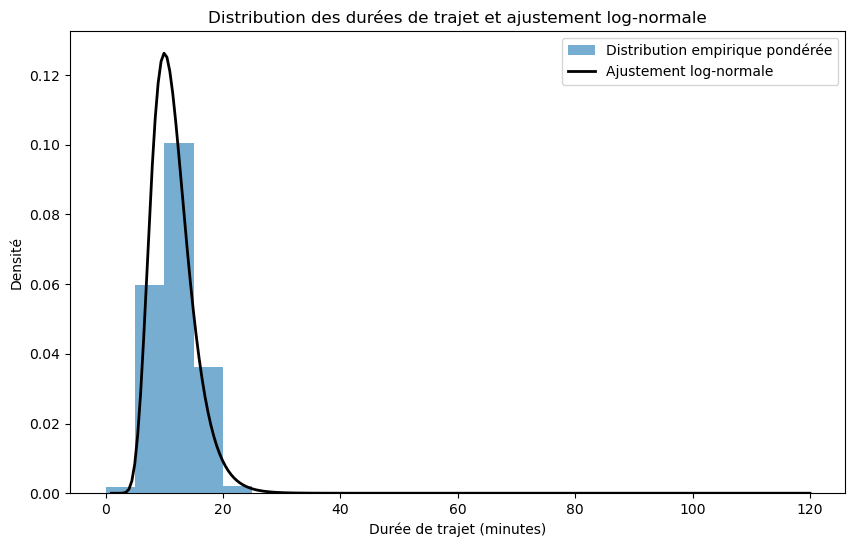

In [28]:
fit_and_plot_distributions(premiers_departs_we)


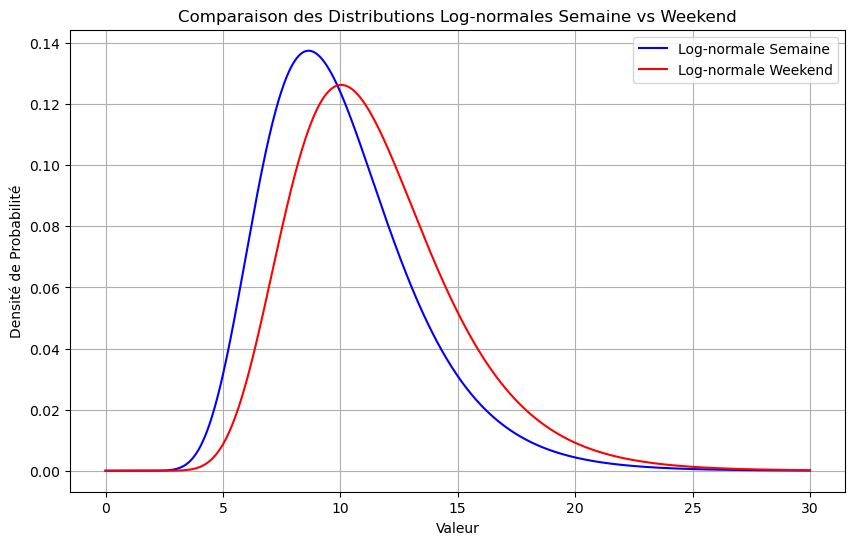

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# Paramètres pour la distribution log-normale de la semaine
sigma_week = 0.3189296144566387
scale_week = 9.573946179214783

# Paramètres pour la distribution log-normale du weekend
sigma_weekend = 0.30078786295454235
scale_weekend = 10.98910490441119

# Définir la plage de valeurs pour x
x = np.linspace(0, 30, 1000)

# Calcul des densités de probabilité
pdf_week = lognorm.pdf(x, s=sigma_week, scale=scale_week)
pdf_weekend = lognorm.pdf(x, s=sigma_weekend, scale=scale_weekend)

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_week, label='Log-normale Semaine', color='blue')
plt.plot(x, pdf_weekend, label='Log-normale Weekend', color='red')
plt.title('Comparaison des Distributions Log-normales Semaine vs Weekend')
plt.xlabel('Valeur')
plt.ylabel('Densité de Probabilité')
plt.legend()
plt.grid(True)
plt.show()

